In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


The special thing about time series data is that data points relate to one another they are dependent

In [13]:
ts = pd.Series(np.random.randn(20), pd.date_range('4/12/2018', freq='H', periods=20))
ts_lagged = ts.shift(5) # Move by 5 hour

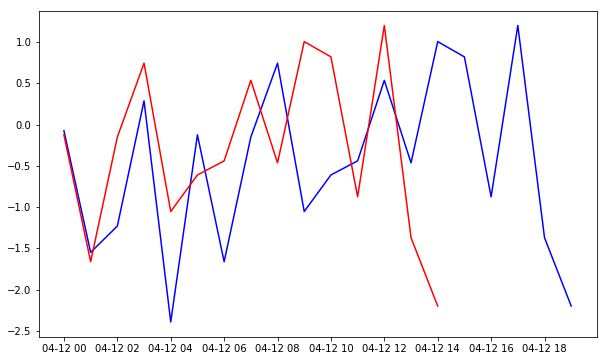

In [12]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='r')

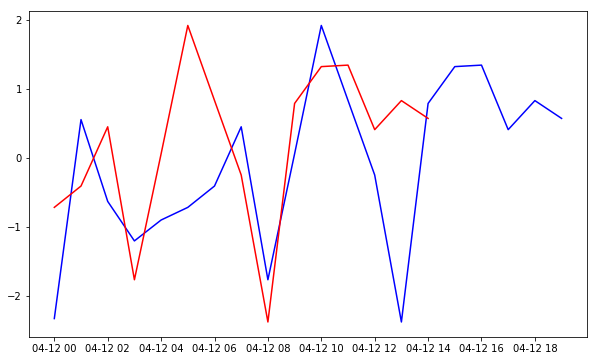

In [14]:
ts_lagged = ts.shift(-5) # Move by 5 hour backward
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='r')

Window function are like aggregate functions we can use them in conjuction with resample

In [20]:
df = pd.DataFrame(np.random.randn(600, 3), index=pd.date_range('4/12/2017', periods=600, freq='D'), columns=list('ABC'))
df.head()

,A,B,C
2017-04-12,-1.555749,-1.908872,-0.966056
2017-04-13,-0.161652,0.275437,-0.132468
2017-04-14,1.165713,0.292845,-0.235932
2017-04-15,0.433112,1.140080,-0.838447
2017-04-16,0.289132,-0.970535,-0.319581


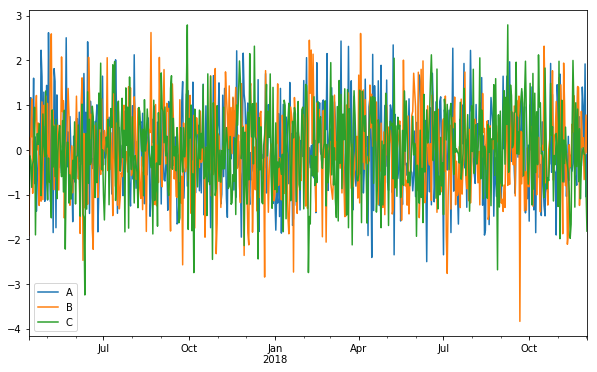

In [21]:
df.plot()

In [22]:
r = df.rolling(window=20)
r

Rolling [window=20,center=False,axis=0]

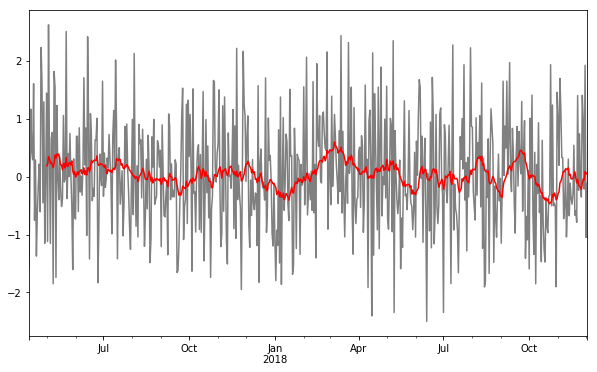

In [29]:
df['A'].plot(color='gray')
r.mean()['A'].plot(color='red')

Here are some rolling options <br />
r.agg, r.apply, r.count, r.mean, r.min, r.max, r.name, r.quantile, r.std, r.var, r.sum, r.kurt, r.skew

In [32]:
r.agg(['sum', 'var'])
r['A'].agg(['sum', 'var'])

,sum,var
2017-04-12,NaN,NaN
2017-04-13,NaN,NaN
2017-04-14,NaN,NaN
2017-04-15,NaN,NaN
2017-04-16,NaN,NaN
2017-04-17,NaN,NaN
2017-04-18,NaN,NaN
2017-04-19,NaN,NaN
2017-04-20,NaN,NaN
2017-04-21,NaN,NaN


Custom rolluing functions

In [36]:
df.rolling(window=10, center=False).apply(lambda x: x[0]/x[1])[0:10]

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,9.624079,-6.930349,7.292752


In [39]:
df.rolling(window=10, center=False).apply(lambda x: x.max()-x.min()) # Max value in a window minus lowest value in a window

,A,B,C
2017-04-12,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN
2017-04-17,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN
2017-04-19,NaN,NaN,NaN
2017-04-20,NaN,NaN,NaN
2017-04-21,3.157827,3.124604,2.851017


In [ ]:
df.rolling(window=10, center=False).apply(lambda x: x[0]-x.[-1]